# Tecmag Analysis

In [4]:
import sys

import pynmr.model.parser.ntnmr as N
import pynmr.model.processor as P
import pynmr.model.operations as O

import matplotlib.pyplot as plt
import numpy as np
import struct
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
data = N.NTNMR("./data/tecmag/11-13C-FID-dnp-DO-CP-InverseNutPh3-10msSpinLock.tnt", debug = True)

Processor = P.Processor([O.LeftShift(21),
                         O.LineBroadening(0.2),
                         O.FourierTransform(),
                       O.Phase0D(85)])
Processor.runStack(data)



OP = O.GetPartialSpectrum(15, -200e3, 200e3)
spec = OP.run(data)
#plt.plot(np.real(data.RFID(0, 0)))
#plt.grid()

The sizeTD2 is:  512
The carrier is at 284.935 MHz
TD1 is 20
Data imported, Number of Experiments:  20


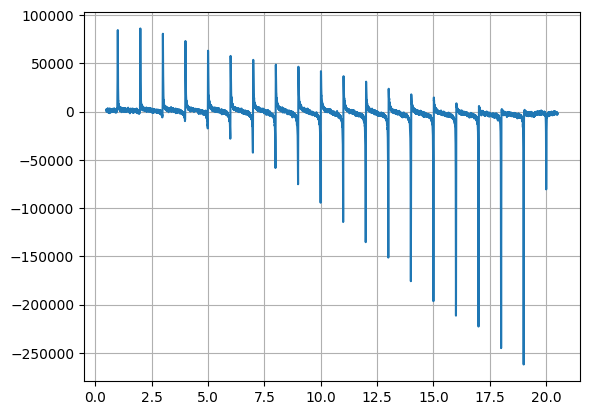

In [22]:
OP = O.GetJoinedPartialSpectra(-200e3, 200e3, returnX=True)
x, spec = OP.run(data)


plt.plot(x, spec)
plt.grid()

In [23]:
OP = O.GetAllIntegrals(-200e3, 200e3)
OP2 = O.GetAllPhases(-200e3, 200e3, unwrap = True)
myList = OP.run(data)
myPhaseList = OP2.run(data)

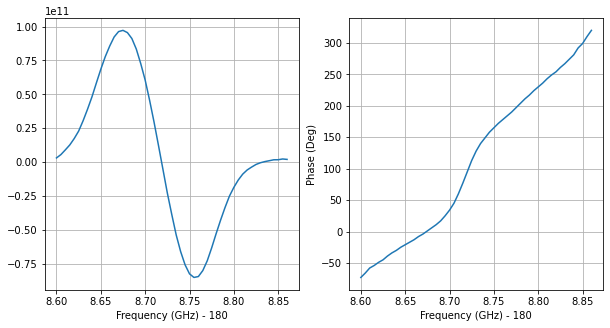

In [6]:
xAxis = np.array([188.6 + 0.005*i for i in range(53)]) - 180

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(xAxis, myList)
plt.xlabel("Frequency (GHz) - 180")
plt.grid()
plt.subplot(1,2,2)
plt.ylabel("Phase (Deg)")
plt.xlabel("Frequency (GHz) - 180")
plt.grid()
plt.plot(xAxis,myPhaseList)

In [7]:
print(data.title)